# **CNN assignment**(Do read the note at the end)

Description: Here we are going to use CNN to classify images of elephants,tigers,cheetah's and crocodiles. Basically multiclass classificiation using CNN.

**Q.1** Import all required modules

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten

**Q.2** Load data using image_dataset_from_directory(https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory)

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

dataset= keras.preprocessing.image_dataset_from_directory(
    '/content/gdrive/MyDrive/data',
    labels= 'inferred',
    label_mode= 'int',
    color_mode= 'rgb',
)

Mounted at /content/gdrive
Found 1658 files belonging to 4 classes.




*   Since data object is not iterable,we will create a nummpy iterator for data.
*   Then use batch to iterate through our data



In [3]:
data_iterator=dataset.as_numpy_iterator()

In [4]:
batch=data_iterator.next()

Run the below code and batch code 2-3 times to visualise the labels given to different animals.

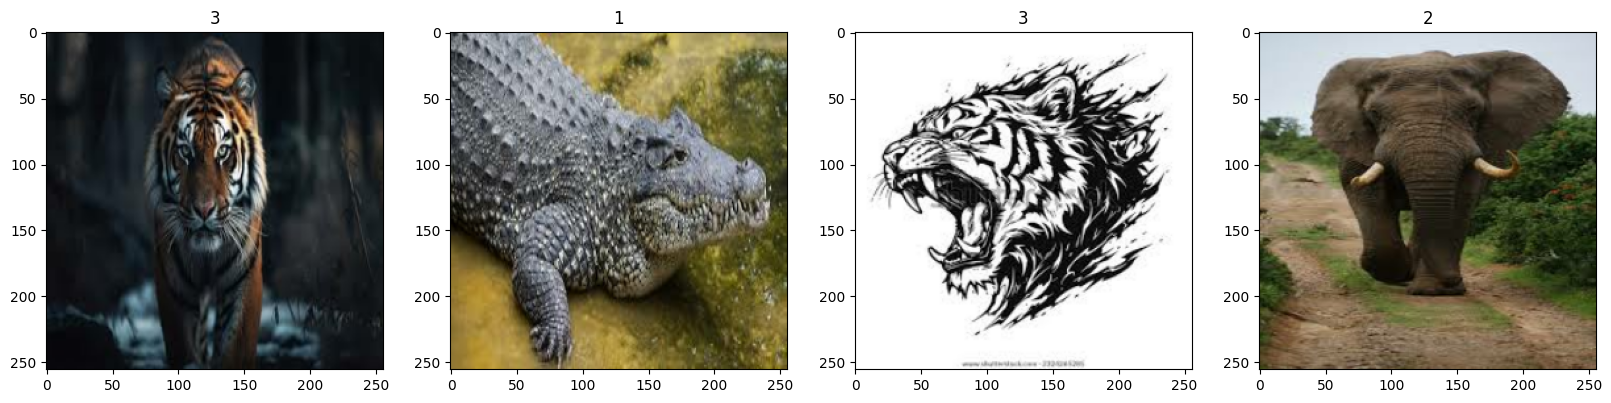

In [5]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(str(batch[1][idx]))

**Q.3** Map the data such that all pixel values lie between 0 and 1 using the **lambda function**

In [6]:
data= dataset.map(lambda x, y: (x/255.0, y))

**Q.4** Split the data into train set and test set(and validation set if needed) using **data.take**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-class-take-method/) and **data.skip**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-skip-method/)

In [7]:
test_frac = 0.1
train_data = data.take(len(data) - int(len(data)*test_frac))
test_data = data.skip(len(data) - int(len(data)*test_frac))

**Creating the model**

**Q.5** Write code to create CNN model including fully connected layers with softmax as final layer.

In [8]:
models= Sequential()
models.add(Input(shape=(256,256,3)))
models.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
models.add(MaxPooling2D(pool_size=(2,2)))
models.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
models.add(MaxPooling2D(pool_size=(2,2)))
models.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
models.add(MaxPooling2D(pool_size=(2,2)))
models.add(Flatten())
models.add(Dense(127, activation='relu'))
models.add(Dense(4, activation='softmax'))

**Q.6** Compile your model

In [9]:
models.compile(
    optimizer= keras.optimizers.Adam(learning_rate= 1.0e-3),
    loss= keras.losses.SparseCategoricalCrossentropy(from_logits= False),
    metrics= ['accuracy'],
)

**Q.7** Fit your model with train set and make sure to keep **less epochs**(10-15) as the dataset size is very large.

In [10]:
models.fit(
    train_data,
    epochs= 10,
    batch_size= 16,
)

Epoch 1/10
47/47 [==============================] - 202s 4s/step - loss: 1.5300 - accuracy: 0.3418
Epoch 2/10
47/47 [==============================] - 203s 4s/step - loss: 1.2003 - accuracy: 0.4501
Epoch 3/10
47/47 [==============================] - 196s 4s/step - loss: 1.0064 - accuracy: 0.5771
Epoch 4/10
47/47 [==============================] - 196s 4s/step - loss: 0.7819 - accuracy: 0.6842
Epoch 5/10
47/47 [==============================] - 200s 4s/step - loss: 0.4813 - accuracy: 0.8278
Epoch 6/10
47/47 [==============================] - 195s 4s/step - loss: 0.3078 - accuracy: 0.8896
Epoch 7/10
47/47 [==============================] - 196s 4s/step - loss: 0.1906 - accuracy: 0.9408
Epoch 8/10
47/47 [==============================] - 200s 4s/step - loss: 0.1144 - accuracy: 0.9654
Epoch 9/10
47/47 [==============================] - 193s 4s/step - loss: 0.0677 - accuracy: 0.9781
Epoch 10/10
47/47 [==============================] - 194s 4s/step - loss: 0.0365 - accuracy: 0.9887


**Q.8** Test your code with test set

In [11]:
loss,accuracy= models.evaluate(
    test_data,
    batch_size= 16,
)

5/5 [==============================] - 20s 1s/step - loss: 0.0129 - accuracy: 1.0000


In [12]:
# Do not change this code
if accuracy>=0.85:
  print(f"Congratulations, CNN assignment complete!! Your accuracy is {accuracy}")
else:
  print(f"Try again, not enough accuracy! Your accuracy is {accuracy}" )

Congratulations, CNN assignment complete!! Your accuracy is 1.0


**Note: 1. Many of you will get very high train accuracy but low test accuracy. This is called overfitting, this can be solved by increasing the train set size. If your getting low accuracy for both train and test, modify your layers in the model.**

**2.Do use T4GPU.Ideally your first epoch will take quite sometime and rest of the epochs will be faster but if all your epochs are taking a lot of time, try starting a new gpu session(open a new gmail account and open colab on that) because your free gpu might have exhausted itself.**

**3.Other than that everything should be fine, happy learning!!**